<a href="https://colab.research.google.com/github/anjunpil/keras_study/blob/master/QLearning%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SFFF
FHFH
FFFH
HFFG
success rate : 0.976
Final Q-Table Values
LEFT DOWN RIGHT UP


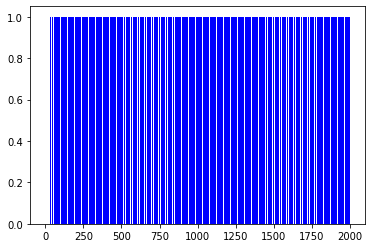

In [2]:
import gym
#import tensorflow
from gym.envs.registration import register
import matplotlib.pyplot as plt
import random as pr
import sys
import numpy as np


def rargmax(vector):
    
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


'''

env = gym.make("FrozenLake-v0")
#환경 초기화
observation= env.reset()

for _ in range(1000):
    #env.render() 화면 출력
    env.render()
    #환경에 따른 action을 설정
    action = env.action_space.sample()
    #done = gameover인지 아닌지를 알려줌
    #info = 추가정보가 있을때 추가정보를 알려줌
    observation,reward,done,info = env.step(action)
'''

LEFT =0
DOWN =1
RIGHT =2
UP =3

#코드를 입력받으면 action을 취한다
arrow_keys={
    '\x1b[A':UP,
    '\x1b[B':DOWN,
    '\x1b[C':RIGHT,
    '\x1b[D':LEFT,
}


register(
    id = "FrozenLake-v7",
    entry_point ="gym.envs.toy_text:FrozenLakeEnv",
    kwargs = {"map_name" : "4x4","is_slippery" : False}
)

env = gym.make("FrozenLake-v7")
env.render()

num_episodes = 2000


Q = np.zeros((env.observation_space.n,env.action_space.n))

rList=[]

for i in range(num_episodes):
    state = env.reset()
    rAll =0
    done = False
    
    while not done:
        #random 한 방향으로 나아간다
        action = rargmax(Q[state,:])
        
        new_state, reward ,done,_ = env.step(action)
        
        Q[state,action] = reward +np.max(Q[new_state,:])
        
        rAll += reward        
        state =  new_state
        
    rList.append(rAll)
    

print("success rate : " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
plt.bar(range(len(rList)),rList,color='blue')
plt.show()

        
    